In [20]:
# Importation de nos packages
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Dans cet nouveau projet, nous allons apprendre à matriser la librairie SIKITLEARN .
Sachant que les principales étapes pour pouvoir entrainer , évaluer et faire des prédictions sur un modèle ,se défini comme ceci:

1- Sélection d'un estimateur et précision de ses hyperparamètres:
model = LinearRegression (..........)

2- Entrainer le modèle sur les données x _train,y_train en tableaux numpy:
model.fit(x_train, y_train)

3- Evaluation du modèle sur les données x_test ,y_test:
model.score(x_test ,y_test)

4-Utilisation du modèle pour des prédictions
model.predict(x_pred)

Dans cette première parti , nous allons travailler avec un dataset de classification notament les fleurs d'iris.
Nous allons abordez :

1- Train_test_split : Nous allons utiliser la fonction train_test_split de sklearn qui nous viens du module model_selection

2- Validation Set

3- Cross Validation 

4- Validation Curve

5- GridSearchCV

6- Learning Curves

7- Exercices

## Train Test Split

In [1]:
# Importation du dataset fleur d'iris
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
# Répartition de nos données
features = iris.data
target = iris.target

In [18]:
target = target.reshape(150,1)
print(target.shape, features.shape)

(150, 1) (150, 4)


Text(0, 0.5, 'Target')

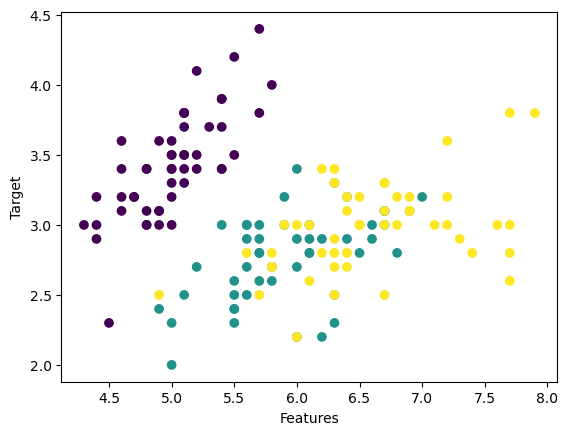

In [29]:
# Visualisation de notre data
plt.scatter(features[:,0], features[:,1], c = target)
plt.xlabel('Features')
plt.ylabel('Target')

In [42]:
# Répartition des données en train et test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features ,target , test_size = 0.4)

In [43]:
print(features.shape ,x_train.shape, target.shape,y_test.shape)

(150, 4) (90, 4) (150, 1) (60, 1)


Text(0.5, 1.0, 'Test set')

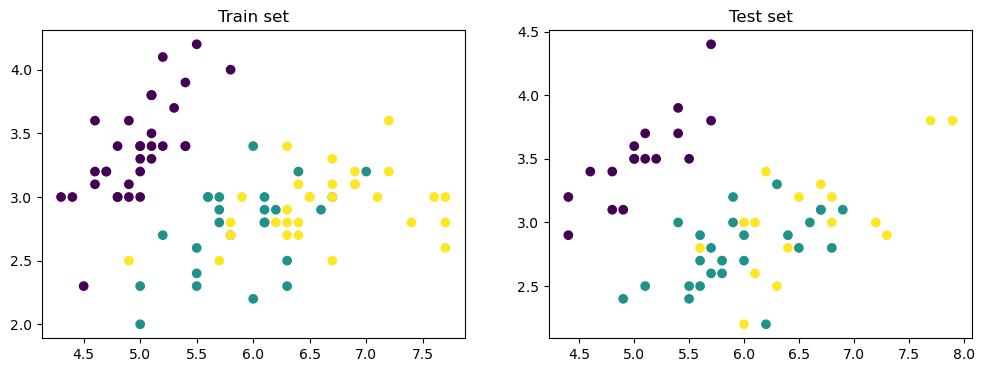

In [50]:
# Visualisation de nos données réparti
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c= y_train )
plt.title('Train set')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c= y_test )
plt.title('Test set')

Etant donné que nous avons affaire un dataset de classification , nous allons utiliser le modèle KNeighborsClassifier du 
package neighbors

In [73]:
# Importation notre modèle
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [74]:
# Entrainement et score = evalution
model.fit(x_train ,y_train)
print('Train score: ',model.score(x_train ,y_train))
print('Test score: ',model.score(x_test ,y_test))

Train score:  1.0
Test score:  0.95


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


On remarque bien que le modele réussi a 100% les predictions sur le trainset mais 95% sur le testset.
Maintenant les performances du modèle en changant les hyperparamètres (n_neighbors)

In [75]:
#Boucle  for pour tester les variations des hyperparamètres 
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train ,y_train)
    print(f'Train score{i}: ',model.score(x_train ,y_train))
    print(f'Test score{i}: ',model.score(x_test ,y_test))

Train score1:  1.0
Test score1:  0.95
Train score2:  0.9777777777777777
Test score2:  0.9666666666666667
Train score3:  0.9666666666666667
Test score3:  0.9666666666666667
Train score4:  0.9666666666666667
Test score4:  0.9833333333333333
Train score5:  0.9666666666666667
Test score5:  0.9833333333333333
Train score6:  0.9777777777777777
Test score6:  0.9833333333333333
Train score7:  0.9777777777777777
Test score7:  0.9833333333333333
Train score8:  0.9666666666666667
Test score8:  0.9833333333333333
Train score9:  0.9777777777777777
Test score9:  0.9666666666666667
Train score10:  0.9777777777777777
Test score10:  0.95


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

On remarque que la meilleur performance est obtenu au n_neighbors = 8

Pour pouvoir comparer les performances de notre modèle (ici en faisant varié ces n_neighbors),on commence par entrainer nos
modèles sur le train_set ensuite on sélectionne celui qui a la meilleur performance puis on l'évalue sur val_set et pour 
terminer sur le test_set afin d'avoir une idée sur sa performance dans la vrai vie.

La question qui se pose est de savoir si la manière dont nous avons découper nos données est la meilleur pour obtenir la meilleur performance ?

Pour se débarasser de cette question , nous allons tourner vers la Cross-Validation.

La Cross-Validation consiste à entrainer puis valider notre modéle sur pluisieurs  découpent possibles du Train_set.
NB : Il existe pluisieurs manières de faire la découpe de nos données. (lire la documentation de sklearn)
                                                                                    

In [78]:
 # ici, nous allons utiliser le cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring = 'accuracy')

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

array([0.94444444, 0.94444444, 0.94444444, 1.        , 1.        ])

La on a obtenu les exactitude de nos 5 splits.
maintenant nous allons faire la moyenne des splits pour chaque n_neighbours choisi.

In [79]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring = 'accuracy').mean()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.9666666666666666

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

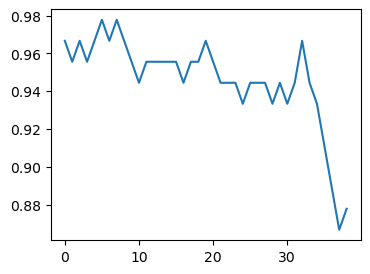

In [86]:
val_score = []
for i in range(1,40):
    score = cross_val_score(KNeighborsClassifier(i), x_train, y_train, cv=5, scoring = 'accuracy').mean()
    val_score.append(score)
plt.figure(figsize= (4,3))
plt.plot(val_score)
 
    

On observe que l'on n'a de meilleurs performances pour n_neighbors = 6 ou 8.
Au lieu d'écrire cette boucle nous même,sklearn dispose d'une fonction (Valdation Curve) qui nous permet de faire le travail

 


In [93]:
from sklearn.model_selection import validation_curve

In [94]:
model = KNeighborsClassifier()
i = np.arange(1,50)
train_score ,val_score = validation_curve(model,x_train,y_train,'n_neighbors',i,cv= 5)

TypeError: too many positional arguments

In [95]:

model = KNeighborsClassifier()
param_name = 'n_neighbors'
param_range = np.arange(1, 50)
train_score, val_score = validation_curve(
estimator=model, X=x_train, y=y_train, param_name=param_name, param_range=param_range, cv=5)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples